Parte1: https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203


In [203]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [204]:
columns=['PopEstimada_2018','RegiaoBrasil', 'PopCenso_2010','IDHM','ReceitasRealizadas_2014','DespesasEmpenhadas_2014','Pib_2014']

# Carregando os datos formatados
data = pd.read_csv (r'data/DATA_F.csv')
df = pd.DataFrame(data, columns=columns)
df

,PopEstimada_2018,RegiaoBrasil,PopCenso_2010,IDHM,ReceitasRealizadas_2014,DespesasEmpenhadas_2014,Pib_2014
0,23167,N,24392,0.641,53490,47577,16461.11
1,5438,N,6313,0.650,22635,19354,18346.17
2,84813,N,78574,0.718,169636,155473,20725.23
3,16444,N,17029,0.692,53147,46774,22179.17
4,16227,N,18591,0.685,34612,34381,15300.88
...,...,...,...,...,...,...,...
4413,3816,CO,3659,0.687,14086,13050,14566.03
4414,13746,CO,12548,0.712,37777,33220,23237.24
4415,8611,CO,7371,0.684,26783,23511,39480.36
4416,6026,CO,4735,0.647,17295,15646,18992.37


In [205]:
def taxaCrescimento(row): return ((row['PopEstimada_2018'] - row['PopCenso_2010'])*100/row['PopEstimada_2018'])

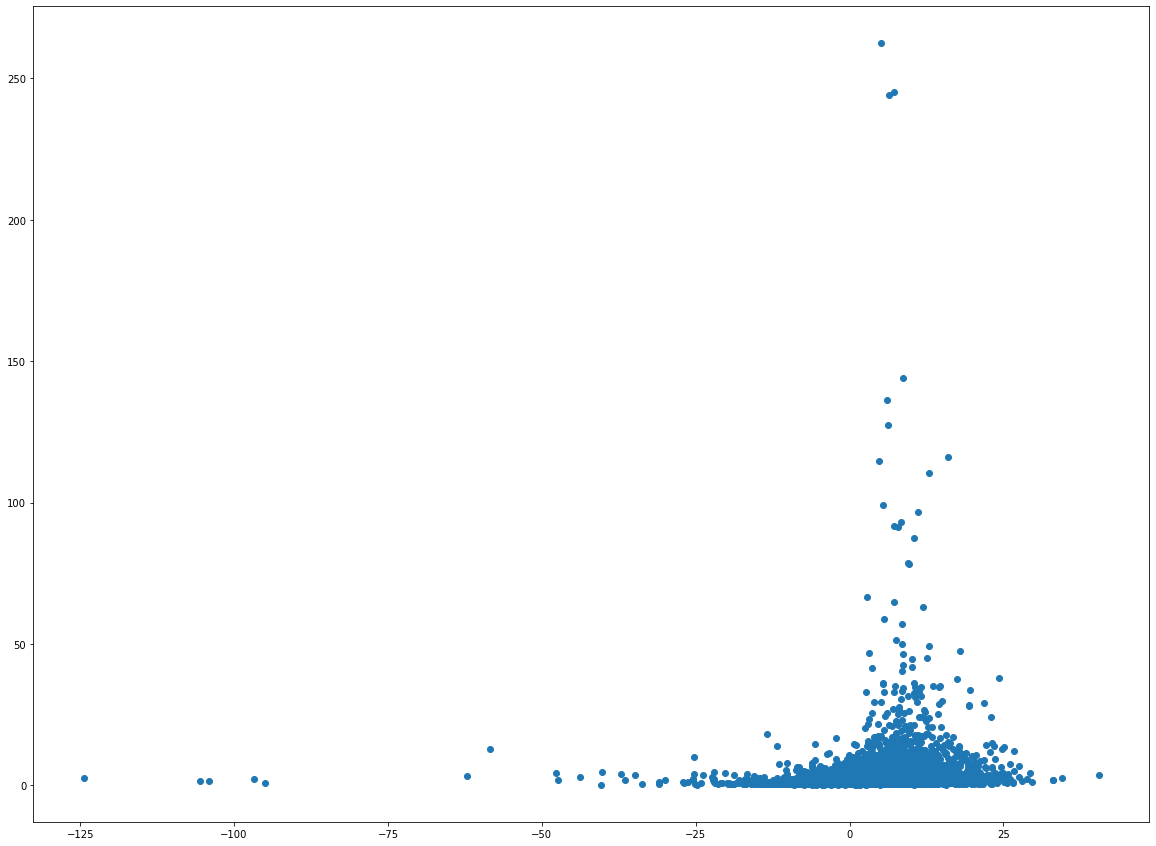

In [206]:
X = np.array([])
for index, row in df.iterrows():
    X = np.append(X , taxaCrescimento(row))
    X = np.append(X , (row['DespesasEmpenhadas_2014']/row['Pib_2014']))
    # X = np.append(X , row['RegiaoBrasil'])
X = X.reshape(len(df),2)
# print(len(df))
# print(X)
plt.figure(figsize=(20, 15))
plt.scatter(X[:,0], X[:,1])

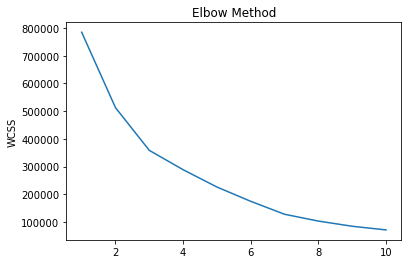

In [207]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('')
plt.ylabel('WCSS')
plt.show()

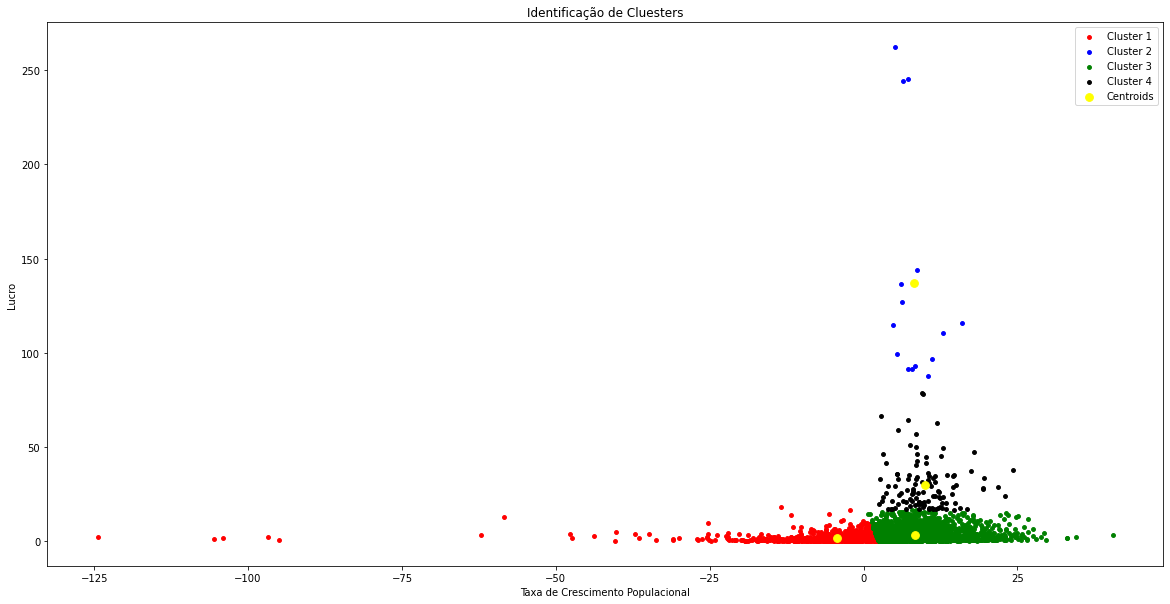

In [208]:
color_vector = ['red', 'blue', 'green', 'black', 'orange', 'brown']
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.figure(figsize=(20, 10))
# plt.scatter(X[:,0], X[:,1], s=15)
for i in range(0, n_clusters):
    plt.scatter(X[pred_y == i, 0], X[pred_y == i, 1], s = 15, c = color_vector[i] , label = 'Cluster ' + str(i + 1))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60, c = 'yellow', label = 'Centroids')
plt.title('Identificação de Cluesters')
plt.xlabel('Taxa de Crescimento Populacional')
plt.ylabel('Lucro')
plt.legend()
plt.show()

Parte 2: https://www.kaggle.com/tonzowonzo/simple-k-means-clustering-on-the-iris-dataset

In [209]:
kmeans.inertia_

288669.4072210078